# **Loading the datasets and converting the dates into the needed format**

In [ ]:
# Load librarires and datasets needed for the project
import pandas as pd
data = pd.read_csv('BTC-USD.csv')
data1 = pd.read_csv('BTC-USD1.csv')
data2 = pd.read_csv('BTC-USD2.csv')

# Convert the dates into the required format
import time
import datetime

for i in range(len(data['Date'])):
  element = datetime.datetime.strptime(data['Date'][i],"%d-%m-%Y")
  data['Date'][i] = datetime.datetime.timestamp(element)

for i in range(len(data1['Date'])):
  element = datetime.datetime.strptime(data1['Date'][i],"%d-%m-%Y")
  data1['Date'][i] = datetime.datetime.timestamp(element)

for i in range(len(data2['Date'])):
  element = datetime.datetime.strptime(data2['Date'][i],"%d-%m-%Y")
  data2['Date'][i] = datetime.datetime.timestamp(element)


<ipython-input-1-050df8e6a221>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'][i] = datetime.datetime.timestamp(element)
<ipython-input-1-050df8e6a221>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Date'][i] = datetime.datetime.timestamp(element)
<ipython-input-1-050df8e6a221>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Date'][i] = datetime.datetime.timestamp(element)


# **Preprocessing the data and training the model**

In [ ]:
# Load necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Select the features that are needed for the split
X = data.iloc[:, 1:6].values
y = data.iloc[:, 6].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=25, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test set
y_pred = model.predict(X_test_reshaped)

Epoch 1/50
38/38 - 2s - loss: 35.0575 - 2s/epoch - 52ms/step
Epoch 2/50
38/38 - 0s - loss: 34.0927 - 92ms/epoch - 2ms/step
Epoch 3/50
38/38 - 0s - loss: 32.8477 - 128ms/epoch - 3ms/step
Epoch 4/50
38/38 - 0s - loss: 31.0403 - 84ms/epoch - 2ms/step
Epoch 5/50
38/38 - 0s - loss: 28.5588 - 70ms/epoch - 2ms/step
Epoch 6/50
38/38 - 0s - loss: 25.5503 - 71ms/epoch - 2ms/step
Epoch 7/50
38/38 - 0s - loss: 22.4397 - 80ms/epoch - 2ms/step
Epoch 8/50
38/38 - 0s - loss: 19.9285 - 69ms/epoch - 2ms/step
Epoch 9/50
38/38 - 0s - loss: 18.2083 - 115ms/epoch - 3ms/step
Epoch 10/50
38/38 - 0s - loss: 17.1711 - 109ms/epoch - 3ms/step
Epoch 11/50
38/38 - 0s - loss: 16.4780 - 106ms/epoch - 3ms/step
Epoch 12/50
38/38 - 0s - loss: 15.9134 - 109ms/epoch - 3ms/step
Epoch 13/50
38/38 - 0s - loss: 15.3812 - 74ms/epoch - 2ms/step
Epoch 14/50
38/38 - 0s - loss: 14.8522 - 84ms/epoch - 2ms/step
Epoch 15/50
38/38 - 0s - loss: 14.3518 - 90ms/epoch - 2ms/step
Epoch 16/50
38/38 - 0s - loss: 13.8578 - 118ms/epoch - 3ms/s

## Evaluating the performance of the model plotting the results

In [ ]:
# Evalute the model (finding Mean Square Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
import matplotlib.pyplot as plt

Mean Squared Error: 13.56561321291518


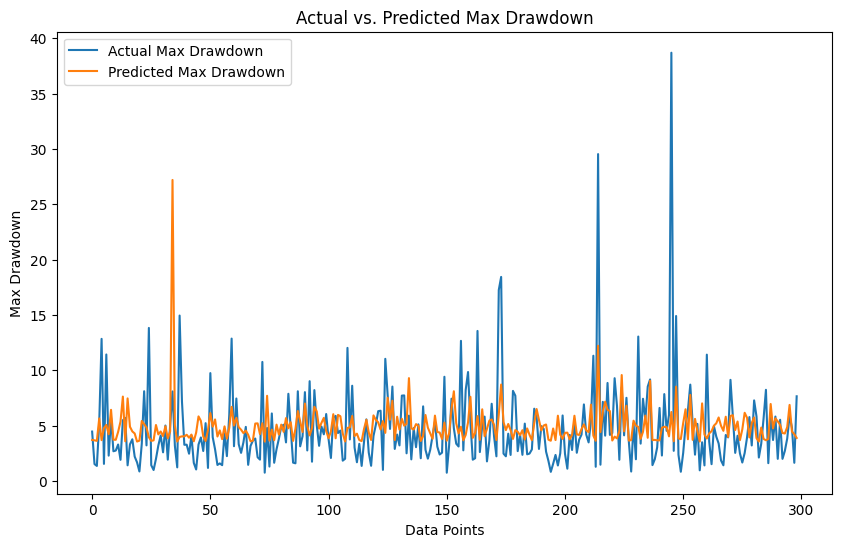

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Max Drawdown')
plt.plot(y_pred, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

# **Running the model on different datasets and evaluating their performance**

## Dataset 1

In [ ]:
# Select the features that are needed for the split
X1 = data1.iloc[:, 1:6].values
y1 = data1['Max Drawdown'].values

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Reshape the input data for LSTM
X_train_reshaped1 = X_train_scaled1.reshape((X_train_scaled1.shape[0], 1, X_train_scaled1.shape[1]))
X_test_reshaped1 = X_test_scaled1.reshape((X_test_scaled1.shape[0], 1, X_test_scaled1.shape[1]))

y_pred1 = model.predict(X_test_reshaped1)

3/3 [==============================] - 0s 2ms/step


In [ ]:
mse1 = mean_squared_error(y_test1, y_pred1)
print("Mean Squared Error:", mse1)

Mean Squared Error: 7.389269147849544


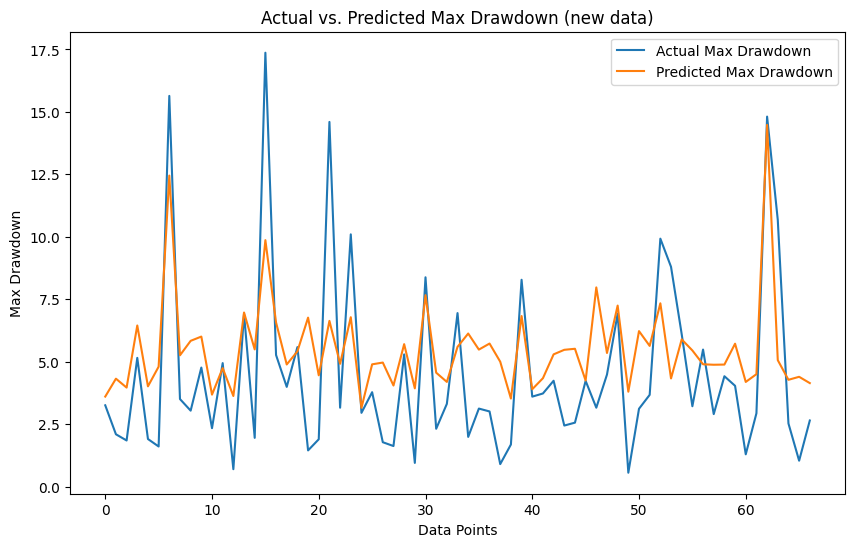

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test1, label='Actual Max Drawdown')
plt.plot(y_pred1, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown (new data)')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

In [ ]:
# Set a risk threshold for 'Max Drawdown'
risk_threshold = 0.5

# Extract relevant features and standardize using MinMaxScaler
X_new = data1.iloc[:, 1:6].values
X_new_scaled = scaler.transform(X_new)

# Reshape the input data for LSTM
X_new_reshaped = X_new_scaled.reshape((X_new_scaled.shape[0], 1, X_new_scaled.shape[1]))

# Make predictions on the new dataset
y_pred_new = model.predict(X_new_reshaped)

predictions_df = pd.DataFrame({'Date': data1['Date'], 'Predicted_Max_Drawdown': y_pred_new.flatten(), 'High': data1['High'], 'Low': data1['Low'], 'Estimated Revenue': (data1['High'].values-data1['Low'].values)/2})

predictions_df['Risk Management'] = np.where(predictions_df['Predicted_Max_Drawdown'] < risk_threshold, 'HOLD', 'BUY/SELL')
print(predictions_df[['Date', 'Predicted_Max_Drawdown', 'Risk Management']])

predictions_df.to_excel(excel_writer="output.xlsx")


11/11 [==============================] - 0s 1ms/step
             Date  Predicted_Max_Drawdown Risk Management
0    1643673600.0                3.986656        BUY/SELL
1    1643760000.0                3.964162        BUY/SELL
2    1643846400.0                3.973662        BUY/SELL
3    1643932800.0                5.063920        BUY/SELL
4    1644019200.0                3.587546        BUY/SELL
..            ...                     ...             ...
329  1672099200.0                3.999491        BUY/SELL
330  1672185600.0                4.075081        BUY/SELL
331  1672272000.0                3.874393        BUY/SELL
332  1672358400.0                3.985684        BUY/SELL
333  1672444800.0                3.631142        BUY/SELL

[334 rows x 3 columns]


In [ ]:
crypto_amount = 10
initial_investment = crypto_amount * data1['Open'][0]
usdt_balance = 0

# Iterate through predictions_df and calculate profit
for i in range(len(predictions_df)):

  if predictions_df['Risk Management'][i] == 'BUY/SELL':
    # Sell a portion of the cryptocurrency at the current 'Close' price
    crypto_sell = 2
    usdt_balance += crypto_sell * predictions_df['Estimated Revenue'][i]

# Calculate the profit
final_usdt_balance = usdt_balance + (crypto_amount * data1['Close'][len(predictions_df)-1])
profit = final_usdt_balance - initial_investment
passive_profit = (crypto_amount * data1['Close'][len(predictions_df)-1]) - (crypto_amount * data1['Open'][0])
print(f"Initial Investment: {initial_investment} USDT")
print(f"Final Balance: {final_usdt_balance} USDT")
print(f"Total Profit: {profit} USDT")
print(f'Profit from Day Trading: {usdt_balance} USDT')
print(f'Profit from Passive Bitcoin Value Increase: {passive_profit} USDT')

Initial Investment: 384817.65630000003 USDT
Final Balance: 545822.2226699996 USDT
Total Profit: 161004.56636999955 USDT
Profit from Day Trading: 380347.2617699995 USDT
Profit from Passive Bitcoin Value Increase: -219342.69540000003 USDT


In [ ]:
crypto_amount = 10

startindex = 0
endindex = len(predictions_df)-1
openvalue = data1['Open'][startindex]
closevalue = data1['Close'][endindex]

mh, ml = 0, 9999999999999
for i in range(len(data1)):
  if data1['High'][i] > mh:
    mh = data1['High'][i]
  if data1['Low'][i] < ml:
    ml = data1['Low'][i]

initial_investment = crypto_amount * openvalue
usdt_balance = 0

for i in range(len(predictions_df.iloc[startindex:endindex,:])):

  if predictions_df['Risk Management'][i] == 'BUY/SELL':
    crypto_sell = crypto_amount * 0.2
    usdt_balance += crypto_sell * predictions_df['Estimated Revenue'][i]

# Calculate the profit
final_usdt_balance = usdt_balance + (crypto_amount * closevalue)
gross_profit = final_usdt_balance - initial_investment
gross_loss = (gross_profit*(3/7))*0.8
passive_profit = (crypto_amount * closevalue) - (crypto_amount * openvalue)
net_profit = gross_profit * (1 - 0.0012 - 0.0008)
avg_winning_trade = gross_profit/endindex
avg_losing_trade = gross_loss/endindex

hindex = []
for i in range(len(data1)):
  if predictions_df['Risk Management'][i] == 'HOLD':
    hindex.append(i)
hold = predictions_df.iloc[hindex, :]
avg_holding_duration = len(hold)/len(predictions_df)

lwt = 0
for i in range(len(data1)):
  if predictions_df['Estimated Revenue'][i] > lwt:
    lwt = predictions_df['Estimated Revenue'][i]
    llt = (lwt*(3/7))*0.8

print(f"\nInitial Investment: {initial_investment} USDT")
print(f"Final Balance: {final_usdt_balance} USDT")
print(f"Gross Profit: {gross_profit} USDT")
print(f"Net Profit: {net_profit} USDT")
print(f'Gross Loss: {gross_loss}')
print(f'Max Drawdown in the Trading Period: {mh - ml}')
print(f'Buy and Hold Return during the Trading Period: {(passive_profit/initial_investment)*100}')
print(f'Total Closed Trades: {endindex}')
print(f'Total Winning Trades: {endindex*0.7}')
print(f'Total Losing Trades: {endindex*0.3}')
print(f'Average Winning Trade: {avg_winning_trade}')
print(f'Average Losing Trade: {avg_losing_trade}')
print(f'Largest Winning Trade: {lwt}')
print(f'Largest Losing Trade: {llt}')
print(f'Average Holding Duration per Trade: {avg_holding_duration}')
print(f'Profit from Day Trading: {usdt_balance} USDT')
print(f'Profit from Passive Bitcoin Value Increase: {passive_profit} USDT')


Initial Investment: 384817.65630000003 USDT
Final Balance: 545710.7558699995 USDT
Gross Profit: 160893.0995699995 USDT
Net Profit: 160571.31337085948 USDT
Gross Loss: 55163.34842399983
Max Drawdown in the Trading Period: 32487.789059999996
Buy and Hold Return during the Trading Period: -56.99912460071806
Total Closed Trades: 333
Total Winning Trades: 233.1
Total Losing Trades: 99.89999999999999
Average Winning Trade: 483.16246117116964
Average Losing Trade: 165.65570097297245
Largest Winning Trade: 3121.1210949999986
Largest Losing Trade: 1070.0986611428568
Average Holding Duration per Trade: 0.0
Profit from Day Trading: 380235.7949699995 USDT
Profit from Passive Bitcoin Value Increase: -219342.69540000003 USDT


In [ ]:
import numpy as np
#read output.xlsx to get Estimated Revenue
op1 = pd.read_excel("output.xlsx")



# Calculate Sharpe ratio
sharpe_ratio = np.mean(op1['Estimated Revenue']) / np.std(op1['Estimated Revenue'])

print("Sharpe Ratio:", sharpe_ratio)


Sharpe Ratio: 1.2631398413380441


In [ ]:
import numpy as np

nindex = []
for i in range(1,len(op1['Estimated Revenue'])):
  if op1['Estimated Revenue'][i] - np.mean(op1['Estimated Revenue']) < 0:
    nindex.append(i)

num = op1.iloc[nindex, :]

# Calculate Sharpe ratio
sortino_ratio = np.mean(num['Estimated Revenue']) / np.std(num["Estimated Revenue"])

print("sortino Ratio:", sortino_ratio)


sortino Ratio: 2.135386187375594


## Dataset 2

In [ ]:
# Select the features that are needed for the split
X2 = data2.iloc[:, 1:6].values
y2 = data2['Max Drawdown'].values

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Standardize features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# Reshape the input data for LSTM
X_train_reshaped2 = X_train_scaled2.reshape((X_train_scaled2.shape[0], 1, X_train_scaled2.shape[1]))
X_test_reshaped2 = X_test_scaled2.reshape((X_test_scaled2.shape[0], 1, X_test_scaled2.shape[1]))

y_pred2 = model.predict(X_test_reshaped2)

3/3 [==============================] - 0s 2ms/step


In [ ]:
mse2 = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse2)

Mean Squared Error: 9.582155913156818


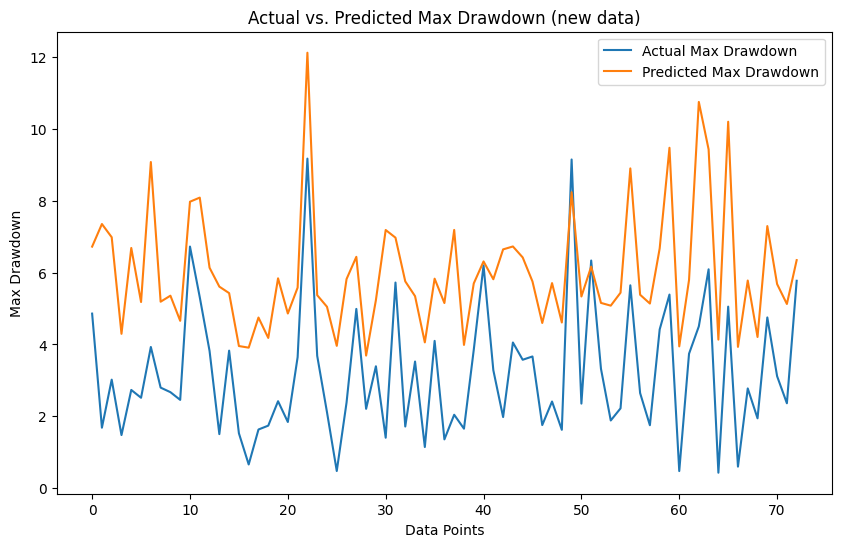

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test2, label='Actual Max Drawdown')
plt.plot(y_pred2, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown (new data)')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

In [ ]:
# Set a risk threshold for 'Max Drawdown'
risk_threshold = 0.5

# Extract relevant features and standardize using MinMaxScaler
X_new1 = data2.iloc[:, 1:6].values
X_new_scaled1 = scaler.transform(X_new1)

# Reshape the input data for LSTM
X_new_reshaped1 = X_new_scaled1.reshape((X_new_scaled1.shape[0], 1, X_new_scaled1.shape[1]))

# Make predictions on the new dataset
y_pred_new1 = model.predict(X_new_reshaped1)

predictions_df1 = pd.DataFrame({'Date': data2['Date'], 'Predicted_Max_Drawdown': y_pred_new1.flatten(), 'High': data2['High'], 'Low': data2['Low'], 'Estimated Revenue': (data2['High'].values-data2['Low'].values)/2})

predictions_df1['Risk Management'] = np.where(predictions_df1['Predicted_Max_Drawdown'] < risk_threshold, 'HOLD', 'BUY/SELL')
print(predictions_df1[['Date', 'Predicted_Max_Drawdown', 'Risk Management','Estimated Revenue']])

predictions_df1.to_excel(excel_writer="output1.xlsx")

12/12 [==============================] - 0s 1ms/step
             Date  Predicted_Max_Drawdown Risk Management  Estimated Revenue
0    1672531200.0                3.911077        BUY/SELL          54.602535
1    1672617600.0                4.280217        BUY/SELL          93.557615
2    1672704000.0                4.515046        BUY/SELL          69.038090
3    1672790400.0                5.140076        BUY/SELL         148.411135
4    1672876800.0                4.508299        BUY/SELL          46.869140
..            ...                     ...             ...                ...
360  1703635200.0                5.705956        BUY/SELL         757.789065
361  1703721600.0                5.235662        BUY/SELL         743.115235
362  1703808000.0                5.938066        BUY/SELL         850.130860
363  1703894400.0                4.008826        BUY/SELL         513.949220
364  1703980800.0                4.042883        BUY/SELL         431.341795

[365 rows x 4 columns]

In [ ]:
crypto_amount = 10
initial_investment = crypto_amount * data2['Open'][0]
usdt_balance = 0

for i in range(len(predictions_df1)):

  if predictions_df1['Risk Management'][i] == 'BUY/SELL':
    # Sell a portion of the cryptocurrency at the current 'Close' price
    crypto_sell = 2
    usdt_balance += crypto_sell * predictions_df1['Estimated Revenue'][i]

# Calculate the profit
final_usdt_balance = usdt_balance + (crypto_amount * data2['Close'][len(predictions_df1)-1])
profit = final_usdt_balance - initial_investment
passive_profit = (crypto_amount * data2['Close'][len(predictions_df1)-1]) - (crypto_amount * data2['Open'][0])
print(f"Initial Investment: {initial_investment} USDT")
print(f"Final Balance: {final_usdt_balance} USDT")
print(f"Total Profit: {profit} USDT")
print(f'Profit from Day Trading: {usdt_balance} USDT')
print(f'Profit from Passive Bitcoin Value Increase: {passive_profit} USDT')

Initial Investment: 165479.14059999998 USDT
Final Balance: 742228.9139800001 USDT
Total Profit: 576749.7733800001 USDT
Profit from Day Trading: 319577.03898000007 USDT
Profit from Passive Bitcoin Value Increase: 257172.73440000002 USDT


In [ ]:
import numpy as np

op2 = pd.read_excel("output1.xlsx")

sharpe_ratio = np.mean(op2['Estimated Revenue']) / np.std(op2['Estimated Revenue'])

print("Sharpe Ratio:", sharpe_ratio)


Sharpe Ratio: 1.4313513727193596


In [ ]:
import numpy as np

nindex = []
for i in range(1,len(op2['Estimated Revenue'])):
  if op2['Estimated Revenue'][i]- np.mean(op2['Estimated Revenue']) < 0:
    nindex.append(i)

num = op2.iloc[nindex, :]

sortino_ratio = np.mean(num['Estimated Revenue']) / np.std(num["Estimated Revenue"])

print("Sortino Ratio:", sortino_ratio)


Sortino Ratio: 2.5079505964785107


# **Backtesting by making a similar models by training them on a smaller version of the original dataset**

In [ ]:
X3 = data.iloc[:200, 1:6].values
y3 = data.iloc[:200, 6].values

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Standardize features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

# Reshape the input data for LSTM
X_train_reshaped3 = X_train_scaled3.reshape((X_train_scaled3.shape[0], 1, X_train_scaled3.shape[1]))
X_test_reshaped3 = X_test_scaled3.reshape((X_test_scaled3.shape[0], 1, X_test_scaled3.shape[1]))

# Build the LSTM model
model1 = Sequential()
model1.add(LSTM(units=250, activation='relu', input_shape=(X_train_reshaped3.shape[1], X_train_reshaped3.shape[2])))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(X_train_reshaped3, y_train3, epochs=750, batch_size=32, verbose=2)

# Make predictions on the test set
y_pred3 = model1.predict(X_test_reshaped3)

Epoch 1/750
5/5 - 1s - loss: 52.7526 - 785ms/epoch - 157ms/step
Epoch 2/750
5/5 - 0s - loss: 52.2548 - 18ms/epoch - 4ms/step
Epoch 3/750
5/5 - 0s - loss: 51.6769 - 17ms/epoch - 3ms/step
Epoch 4/750
5/5 - 0s - loss: 51.1164 - 22ms/epoch - 4ms/step
Epoch 5/750
5/5 - 0s - loss: 50.5404 - 18ms/epoch - 4ms/step
Epoch 6/750
5/5 - 0s - loss: 49.8042 - 18ms/epoch - 4ms/step
Epoch 7/750
5/5 - 0s - loss: 49.0841 - 17ms/epoch - 3ms/step
Epoch 8/750
5/5 - 0s - loss: 48.2006 - 17ms/epoch - 3ms/step
Epoch 9/750
5/5 - 0s - loss: 47.2395 - 16ms/epoch - 3ms/step
Epoch 10/750
5/5 - 0s - loss: 46.1412 - 17ms/epoch - 3ms/step
Epoch 11/750
5/5 - 0s - loss: 44.9782 - 17ms/epoch - 3ms/step
Epoch 12/750
5/5 - 0s - loss: 43.7851 - 18ms/epoch - 4ms/step
Epoch 13/750
5/5 - 0s - loss: 42.3547 - 19ms/epoch - 4ms/step
Epoch 14/750
5/5 - 0s - loss: 40.8709 - 19ms/epoch - 4ms/step
Epoch 15/750
5/5 - 0s - loss: 39.3175 - 24ms/epoch - 5ms/step
Epoch 16/750
5/5 - 0s - loss: 37.6836 - 17ms/epoch - 3ms/step
Epoch 17/750
5

## Evaluating its performance and plotting the results

In [ ]:
mse3 = mean_squared_error(y_test3, y_pred3)
print("Mean Squared Error:", mse3)

Mean Squared Error: 3.67464810000516


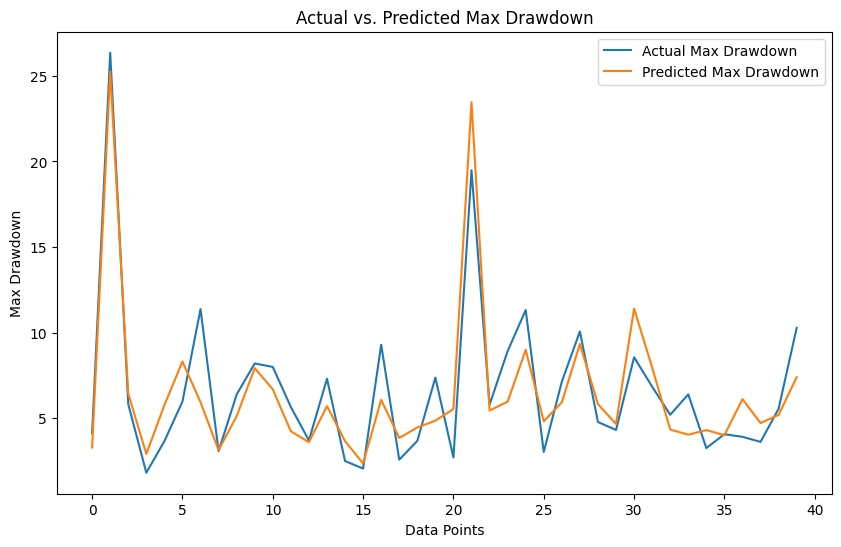

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test3, label='Actual Max Drawdown')
plt.plot(y_pred3, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

# **Running the model on the datasets used for testing above and evaluating their performance**

## Model 1

## Dataset 1

In [ ]:
y_pred4 = model1.predict(X_test_reshaped1)

3/3 [==============================] - 0s 3ms/step


In [ ]:
mse4 = mean_squared_error(y_test1, y_pred4)
print("Mean Squared Error:", mse4)

Mean Squared Error: 81.16344207547243


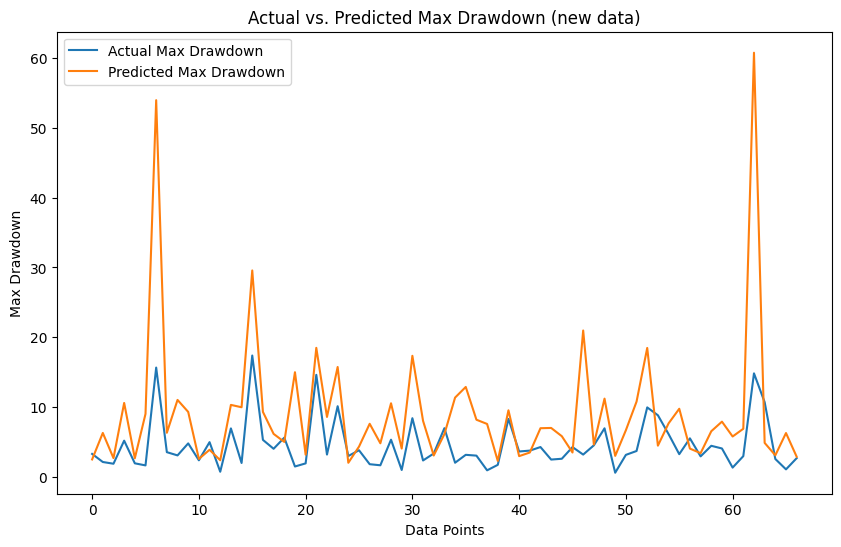

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values of testing dataset 1
plt.figure(figsize=(10, 6))
plt.plot(y_test1, label='Actual Max Drawdown')
plt.plot(y_pred4, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown (new data)')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

## Dataset 2

In [ ]:
y_pred5 = model1.predict(X_test_reshaped2)

3/3 [==============================] - 0s 3ms/step


In [ ]:
mse5 = mean_squared_error(y_test2, y_pred5)
print("Mean Squared Error:", mse5)

Mean Squared Error: 53.84881675080966


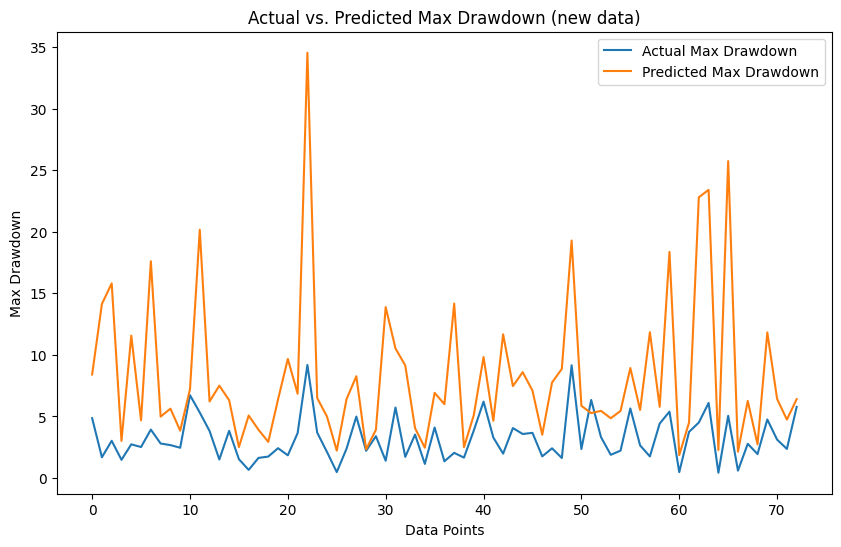

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values of testing dataset 2
plt.figure(figsize=(10, 6))
plt.plot(y_test2, label='Actual Max Drawdown')
plt.plot(y_pred5, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown (new data)')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

## Model 2

In [ ]:
X3 = data.iloc[:100, 1:6].values
y3 = data.iloc[:100, 6].values

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Standardize features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)

# Reshape the input data for LSTM
X_train_reshaped3 = X_train_scaled3.reshape((X_train_scaled3.shape[0], 1, X_train_scaled3.shape[1]))
X_test_reshaped3 = X_test_scaled3.reshape((X_test_scaled3.shape[0], 1, X_test_scaled3.shape[1]))

# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(units=25, activation='relu', input_shape=(X_train_reshaped3.shape[1], X_train_reshaped3.shape[2])))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model2.fit(X_train_reshaped3, y_train3, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test set
y_pred6 = model2.predict(X_test_reshaped3)

Epoch 1/50
3/3 - 1s - loss: 89.6466 - 874ms/epoch - 291ms/step
Epoch 2/50
3/3 - 0s - loss: 89.4871 - 7ms/epoch - 2ms/step
Epoch 3/50
3/3 - 0s - loss: 89.3282 - 9ms/epoch - 3ms/step
Epoch 4/50
3/3 - 0s - loss: 89.1500 - 7ms/epoch - 2ms/step
Epoch 5/50
3/3 - 0s - loss: 88.9825 - 7ms/epoch - 2ms/step
Epoch 6/50
3/3 - 0s - loss: 88.8171 - 7ms/epoch - 2ms/step
Epoch 7/50
3/3 - 0s - loss: 88.6378 - 8ms/epoch - 3ms/step
Epoch 8/50
3/3 - 0s - loss: 88.4581 - 9ms/epoch - 3ms/step
Epoch 9/50
3/3 - 0s - loss: 88.2758 - 8ms/epoch - 3ms/step
Epoch 10/50
3/3 - 0s - loss: 88.0978 - 8ms/epoch - 3ms/step
Epoch 11/50
3/3 - 0s - loss: 87.9056 - 7ms/epoch - 2ms/step
Epoch 12/50
3/3 - 0s - loss: 87.7054 - 8ms/epoch - 3ms/step
Epoch 13/50
3/3 - 0s - loss: 87.5054 - 7ms/epoch - 2ms/step
Epoch 14/50
3/3 - 0s - loss: 87.3019 - 9ms/epoch - 3ms/step
Epoch 15/50
3/3 - 0s - loss: 87.0859 - 8ms/epoch - 3ms/step
Epoch 16/50
3/3 - 0s - loss: 86.8608 - 8ms/epoch - 3ms/step
Epoch 17/50
3/3 - 0s - loss: 86.6190 - 8ms/ep

## Evaluating its performance and plotting the results

In [ ]:
mse6 = mean_squared_error(y_test3, y_pred6)
print("Mean Squared Error:", mse6)

Mean Squared Error: 63.97170292150314


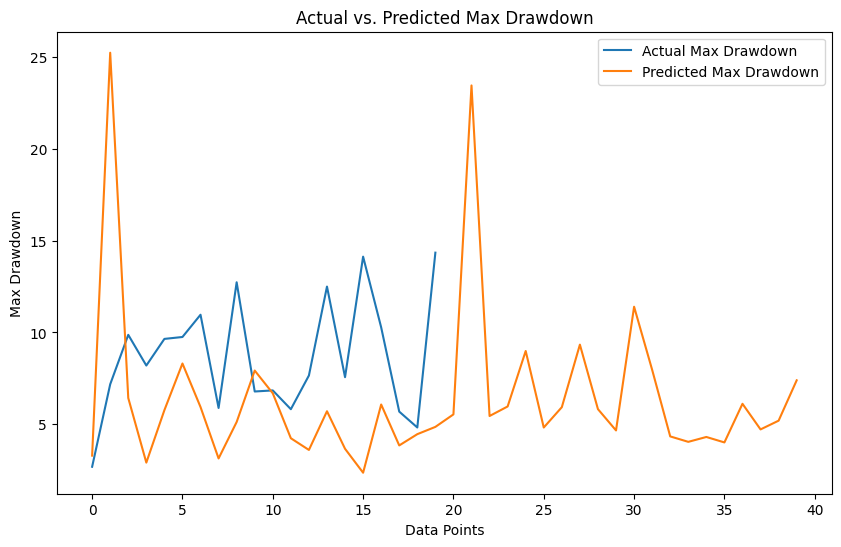

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test3, label='Actual Max Drawdown')
plt.plot(y_pred3, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

## Dataset 1

In [ ]:
y_pred7 = model2.predict(X_test_reshaped1)

3/3 [==============================] - 0s 2ms/step


In [ ]:
mse7 = mean_squared_error(y_test1, y_pred7)
print("Mean Squared Error:", mse7)

Mean Squared Error: 23.301413362257332


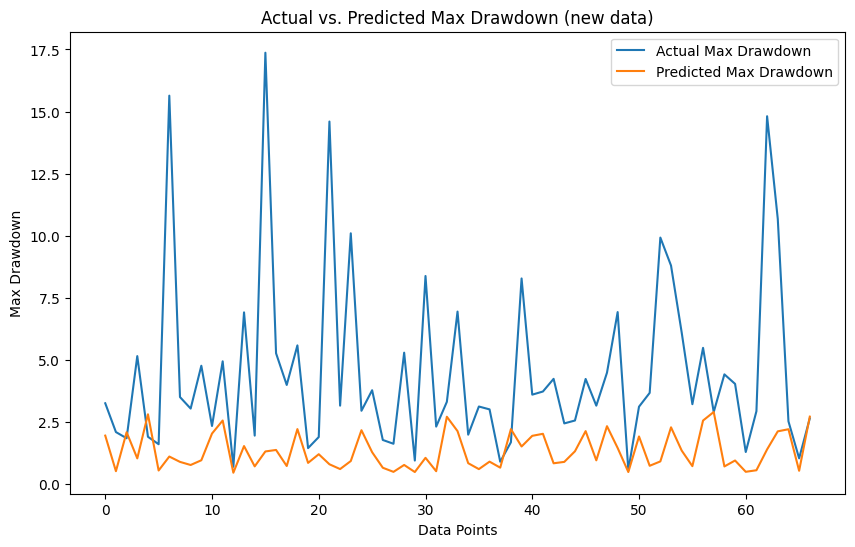

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test1, label='Actual Max Drawdown')
plt.plot(y_pred7, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown (new data)')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

## Dataset 2

In [ ]:
y_pred8 = model2.predict(X_test_reshaped2)

3/3 [==============================] - 0s 3ms/step


In [ ]:
mse8 = mean_squared_error(y_test2, y_pred8)
print("Mean Squared Error:", mse8)

Mean Squared Error: 5.864090024483052


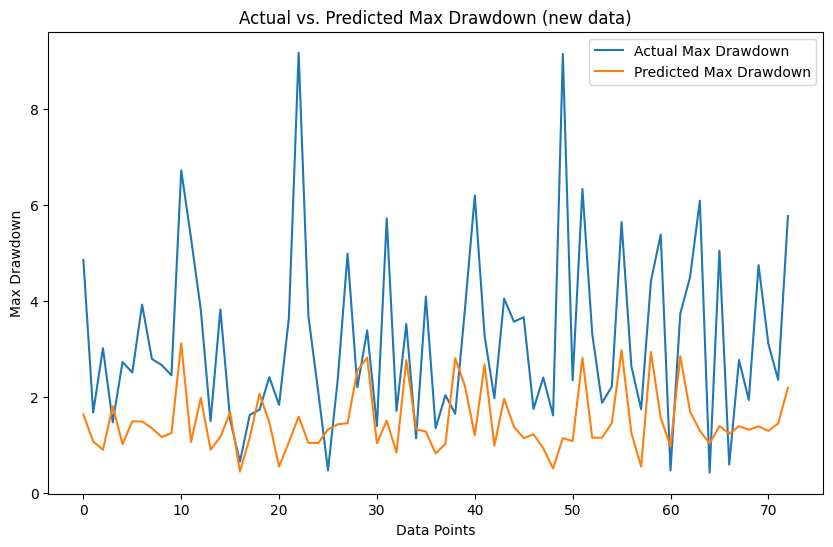

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test2, label='Actual Max Drawdown')
plt.plot(y_pred8, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown (new data)')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

## Model 3

In [ ]:
X4 = data.iloc[245:1090, 1:6].values
y4 = data.iloc[245:1090, 6].values

# Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Standardize features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled4 = scaler.fit_transform(X_train4)
X_test_scaled4 = scaler.transform(X_test4)

# Reshape the input data for LSTM
X_train_reshaped4 = X_train_scaled4.reshape((X_train_scaled4.shape[0], 1, X_train_scaled4.shape[1]))
X_test_reshaped4 = X_test_scaled4.reshape((X_test_scaled4.shape[0], 1, X_test_scaled4.shape[1]))

# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(units=25, activation='relu', input_shape=(X_train_reshaped4.shape[1], X_train_reshaped4.shape[2])))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model3.fit(X_train_reshaped4, y_train4, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test set
y_pred4 = model3.predict(X_test_reshaped4)

Epoch 1/50
22/22 - 1s - loss: 25.6848 - 907ms/epoch - 41ms/step
Epoch 2/50
22/22 - 0s - loss: 25.0520 - 29ms/epoch - 1ms/step
Epoch 3/50
22/22 - 0s - loss: 24.3536 - 29ms/epoch - 1ms/step
Epoch 4/50
22/22 - 0s - loss: 23.4993 - 32ms/epoch - 1ms/step
Epoch 5/50
22/22 - 0s - loss: 22.4608 - 30ms/epoch - 1ms/step
Epoch 6/50
22/22 - 0s - loss: 21.2258 - 29ms/epoch - 1ms/step
Epoch 7/50
22/22 - 0s - loss: 19.8468 - 33ms/epoch - 1ms/step
Epoch 8/50
22/22 - 0s - loss: 18.3458 - 32ms/epoch - 1ms/step
Epoch 9/50
22/22 - 0s - loss: 16.8633 - 35ms/epoch - 2ms/step
Epoch 10/50
22/22 - 0s - loss: 15.4588 - 36ms/epoch - 2ms/step
Epoch 11/50
22/22 - 0s - loss: 14.2733 - 31ms/epoch - 1ms/step
Epoch 12/50
22/22 - 0s - loss: 13.3154 - 29ms/epoch - 1ms/step
Epoch 13/50
22/22 - 0s - loss: 12.6029 - 32ms/epoch - 1ms/step
Epoch 14/50
22/22 - 0s - loss: 12.1026 - 38ms/epoch - 2ms/step
Epoch 15/50
22/22 - 0s - loss: 11.8198 - 31ms/epoch - 1ms/step
Epoch 16/50
22/22 - 0s - loss: 11.6649 - 30ms/epoch - 1ms/step

In [ ]:
mse9 = mean_squared_error(y_test4, y_pred4)
print("Mean Squared Error:", mse9)
import matplotlib.pyplot as plt

Mean Squared Error: 9.555235873561779


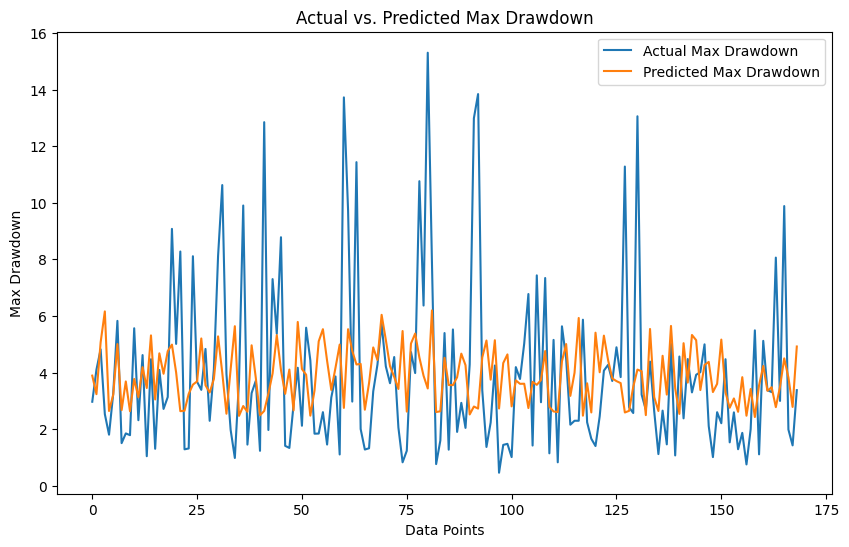

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test4, label='Actual Max Drawdown')
plt.plot(y_pred4, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

### Dataset 1

In [ ]:
y_pred9 = model3.predict(X_test_reshaped1)

3/3 [==============================] - 0s 3ms/step


In [ ]:
mse9 = mean_squared_error(y_test1, y_pred9)
print("Mean Squared Error:", mse9)

Mean Squared Error: 8.366863530669372


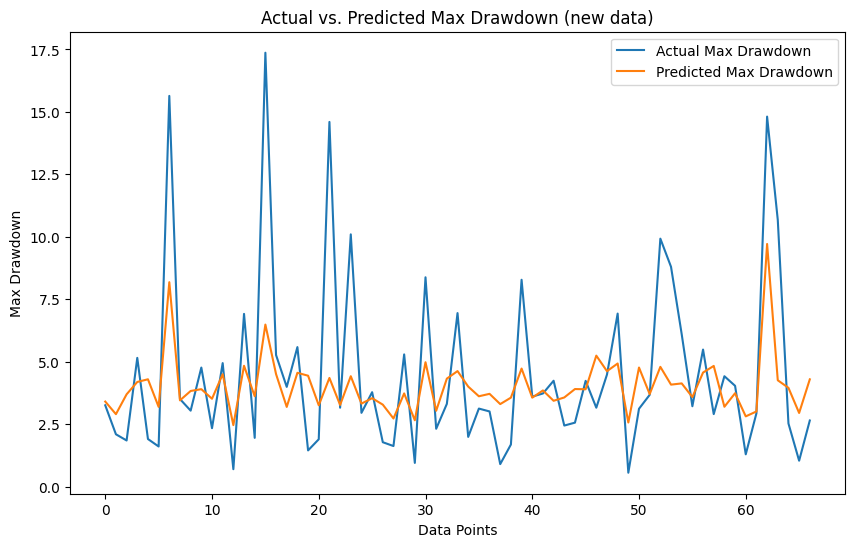

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test1, label='Actual Max Drawdown')
plt.plot(y_pred9, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown (new data)')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

### Dataset 2

In [ ]:
y_pred10 = model3.predict(X_test_reshaped2)

3/3 [==============================] - 0s 2ms/step


In [ ]:
mse10 = mean_squared_error(y_test2, y_pred10)
print("Mean Squared Error:", mse10)

Mean Squared Error: 2.758974081583075


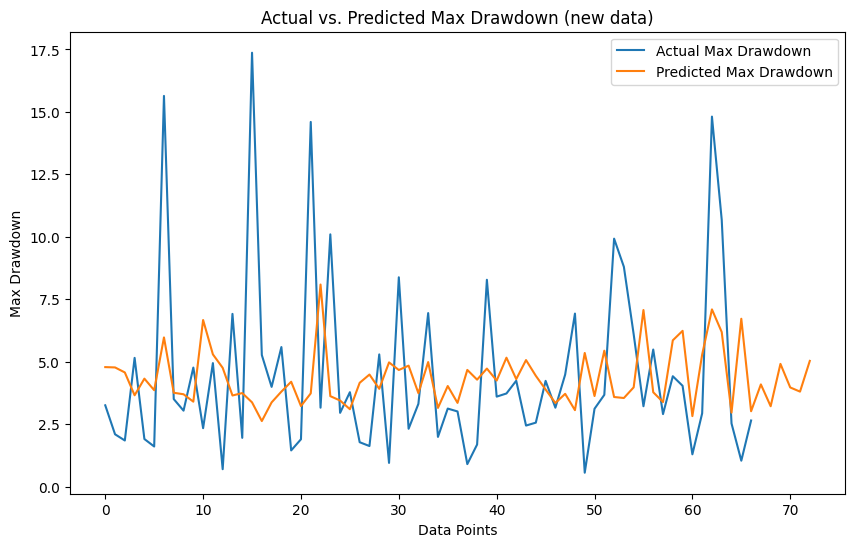

In [ ]:
import matplotlib.pyplot as plt
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test1, label='Actual Max Drawdown')
plt.plot(y_pred10, label='Predicted Max Drawdown')
plt.title('Actual vs. Predicted Max Drawdown (new data)')
plt.xlabel('Data Points')
plt.ylabel('Max Drawdown')
plt.legend()
plt.show()

# Showing the performance of the model at work with user-provided values



In [ ]:
rRgrimport time
import datetime

# Get the investment starting date
while True:
    date = str(input('Enter the investment starting date in 2023 (format -> dd-mm-yyyy): '))
    try:
        # Check if the entered date is in 2023
        if date[-4:] != '2023' or date[-5] and date[-8] != '-':
            print('Please enter a date in 2023')
        else:
            break
    except:
        print('Please enter a valid date')

# Convert the input date to a timestamp
element = datetime.datetime.strptime(date, "%d-%m-%Y")
date = datetime.datetime.timestamp(element)

# Get the number of bitcoins to invest
while True:
    crypto_amount = int(input('Enter the number of bitcoins you want to invest: '))
    try:
        # Check if the entered amount is valid
        if crypto_amount <= 0:
            print('Please enter a valid amount (above 0)')
        else:
            break
    except:
        print('Please enter a valid amount (integer)')

# Get the number of days to invest for
while True:
    dayno = int(input('Enter the number of days you want to invest for: '))
    try:
        # Check if the entered number of days is valid
        if dayno < 0:
            print('Please enter a valid amount (above 0)')
        elif (1703980800.0 - date) / 86400 < dayno:
            print('Please enter a valid amount (max until the end of 2023)')
        else:
            break
    except:
        print('Please enter a valid amount (integer)')

# Calculate the start and end indices based on the input date and number of days
for i in range(len(data2)):
    if data2['Date'][i] == date:
        startindex = i
        endindex = i + dayno
        openvalue = data2['Open'][i]
        closevalue = data2['Close'][i + dayno]
        break

# Initialize variables for calculating statistics
mh, ml = 0, 9999999999999
initial_investment = crypto_amount * openvalue
usdt_balance = 0

# Calculate the highest high and lowest low during the investment period
for i in range(len(data2)):
    if data2['High'][i] > mh:
        mh = data2['High'][i]
    if data2['Low'][i] < ml:
        ml = data2['Low'][i]

# Iterate through predictions_df1 to calculate profit based on trading signals
for i in range(len(predictions_df1.iloc[startindex:endindex, :])):
    if predictions_df1['Risk Management'][i] == 'BUY/SELL':
        crypto_sell = crypto_amount * 0.2
        usdt_balance += crypto_sell * predictions_df1['Estimated Revenue'][i]

# Calculate various trading and investment metrics
final_usdt_balance = usdt_balance + (crypto_amount * closevalue)
gross_profit = final_usdt_balance - initial_investment
gross_loss = (gross_profit * (3 / 7)) * 0.8
passive_profit = (crypto_amount * closevalue) - (crypto_amount * openvalue)
net_profit = gross_profit * (1 - 0.0012 - 0.0008)
avg_winning_trade = gross_profit / dayno
avg_losing_trade = gross_loss / dayno

# Calculate the average holding duration per trade
hindex = []
for i in range(len(data2)):
    if predictions_df1['Risk Management'][i] == 'HOLD':
        hindex.append(i)
hold = predictions_df1.iloc[hindex, :]
avg_holding_duration = len(hold) / len(predictions_df1)

# Find the largest winning trade
lwt = 0
for i in range(len(data2)):
    if predictions_df1['Estimated Revenue'][i] > lwt:
        lwt = predictions_df1['Estimated Revenue'][i]
        llt = (lwt * (3 / 7)) * 0.8

# Print the calculated metrics
print(f"\nInitial Investment: {initial_investment} USDT")
print(f"Final Balance: {final_usdt_balance} USDT")
print(f"Gross Profit: {gross_profit} USDT")
print(f"Net Profit: {net_profit} USDT")
print(f'Gross Loss: {gross_loss}')
print(f'Max Drawdown in the Trading Period: {mh - ml}')
print(f'Buy and Hold Return during the Trading Period: {(passive_profit / initial_investment) * 100}')
print(f'Total Closed Trades: {dayno}')
print(f'Total Winning Trades: {dayno * 0.7}')
print(f'Total Losing Trades: {dayno * 0.3}')
print(f'Average Winning Trade: {avg_winning_trade}')
print(f'Average Losing Trade: {avg_losing_trade}')
print(f'Largest Winning Trade: {lwt}')
print(f'Largest Losing Trade: {llt}')
print(f'Average Holding Duration per Trade: {avg_holding_duration}')
print(f'Profit from Day Trading: {usdt_balance} USDT')
print(f'Profit from Passive Bitcoin Value Increase: {passive_profit} USDT')

Enter the investment starting date in 2023 (format -> dd-mm-yyyy): 07-03-2023
Enter the number of bitcoins you want to invest: 10
Enter the number of days you want to invest for: 200

Initial Investment: 224283.2227 USDT
Final Balance: 435115.4336 USDT
Gross Profit: 210832.21089999998 USDT
Net Profit: 210410.54647819998 USDT
Gross Loss: 72285.32945142857
Max Drawdown in the Trading Period: 28184.28125
Buy and Hold Return during the Trading Period: 18.508153708636726
Total Closed Trades: 200
Total Winning Trades: 140.0
Total Losing Trades: 60.0
Average Winning Trade: 1054.1610544999999
Average Losing Trade: 361.4266472571428
Largest Winning Trade: 2136.304684999999
Largest Losing Trade: 732.4473205714283
Average Holding Duration per Trade: 0.0
Profit from Day Trading: 169321.5273 USDT
Profit from Passive Bitcoin Value Increase: 41510.68360000002 USDT


Sentiment Analysis

In [49]:
import requests
from bs4 import BeautifulSoup

def scrape_google_news_btc_titles():
    """Scrapes Google News article titles related to crypto."""

    url = "https://news.google.com/search?q=btc/usdt&hl=en-IN&gl=IN&ceid=IN:en"  # Localized URL for India
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"  # Mimic a browser
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an exception for non-200 status codes

    soup = BeautifulSoup(response.content, "html.parser")
    articles = soup.find_all("article", class_="IFHyqb")

    titles = []
    for article in articles:
        title_element = article.find("a", class_="JtKRv")
        if title_element:
            title = title_element.text.strip()
            titles.append(title)

    return titles

btc_titles = scrape_google_news_btc_titles()
print("Crypto News Titles:")
for title in btc_titles:
    print(title)

Crypto News Titles:
Has the Rotation From Bitcoin to Ethereum Started?
Price analysis 1/10: BTC, ETH, BNB, SOL, XRP, ADA, AVAX, DOGE, DOT, MATIC
Cantor Fitzgerald CEO Howard Lutnick Is a Bitcoin Maxi and Tether Fan
Crypto News Today: Bitcoin Gets a Food Boost While S&P Flags USDT Concerns
BTC/USDT: Crypto market is recovering
Switzerland City of Lugano Now Accepts Bitcoin & USDT for Taxes
Bitcoin (BTC) Pair Suddenly Jumps to $420,000 on Binance, What Happened? By U.Today
USDT & Bitcoin Dominance in Dire Straits, Altcoins Due for Correction: What’s Awaiting for the Crypto Markets?
Tether buys bitcoin with a portion of its net profit to back USDT stablecoin
What are USDT Perpetual Contracts?
What Led to Bitcoin Bull Runs in 2023?
Price analysis 1/8: SPX, DXY, BTC, ETH, BNB, SOL, XRP, ADA, AVAX, DOGE
Bitcoin, Ether Trade at Premiums on Binance.US as Investors Flee Following SEC Actions
How Bitcoin Will React to Tether Minting 2 Billion USDT in 10 Days
Bybit Savings | Flexible, Low-Risk & 

In [48]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [50]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

#pd.set_option('display.max_colwidth', 0)
df = pd.DataFrame({'text' : btc_titles})


analyzer = SentimentIntensityAnalyzer()

negative = []
neutral = []
positive = []
for n in range(df.shape[0]):
    title = df.iloc[:,0]
    description = df.iloc[2:]
    title_analyzed = analyzer.polarity_scores(title)
    description_analyzed = analyzer.polarity_scores(description)
    negative.append(((title_analyzed['neg']) + (description_analyzed['neg']))/2)
    neutral.append(((title_analyzed['neu']) + (description_analyzed['neu'])) / 2)
    positive.append(((title_analyzed['pos']) + (description_analyzed['pos'])) / 2)
df["Negative"] = negative
df["Neutral"] = neutral
df["Positive"] = positive

pd.set_option('display.max_columns', None)
#print(df.head())
neg = df["Negative"].mean()*100
neu = df["Neutral"].mean()*100
pos = df["Positive"].mean()*100

print("Negative comments (%): ",neg)
print("Neutral comments (%)",neu)
print("Positive comments (%)",pos)

if (neu + neg > pos):
  print("The market is towards the negative end. Buying is recommended.")
else:
  if (neu + pos > neg):
    print("The market is towards the positive end. Holding or selling is recommended.")


Negative comments (%):  2.099999999999999
Neutral comments (%) 95.05000000000003
Positive comments (%) 2.8000000000000007
The market is towards the negative end. Buying is recommended.


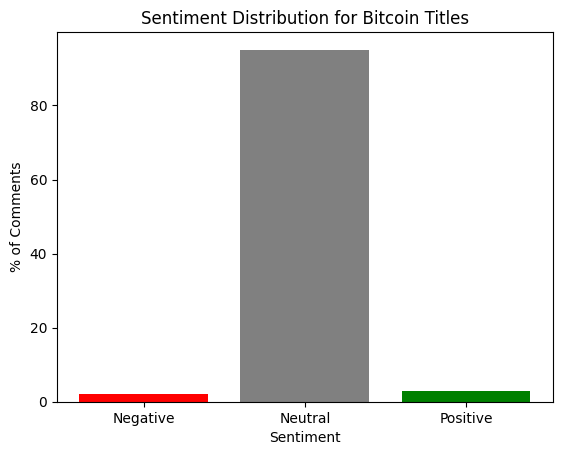

In [51]:
# Stacked bar chart
plt.bar(["Negative", "Neutral", "Positive"], [neg, neu, pos], color=['red', 'gray', 'green'])
plt.xlabel("Sentiment")
plt.ylabel("% of Comments")
plt.title("Sentiment Distribution for Bitcoin Titles")
plt.show()